<center><h2>DS102 Problem Set - Week 5</h2></center>
**Hackwagon Academy**

`HWA-DS102-PS5-201810`
<hr>

If you have any questions to the Problem Set, feel free to send a message to your TAs or Instructors in the Telegram chat. You are encouraged to also discuss the problem sets within your own groups.

<div class="alert alert-success">Before you start, fill in your details for this notebook and rename the notebook to `<First_Name>_<Last_Name>-problem-set-week-5`, for example `jane-doe-problem-set-week-5`.</div>

In [1]:
# Rename the notebook. Then, fill in your details here.
# Name  : Tan Wei Xuan
# Class : DS102, Saturday 3.30PM


# score : 11.5/12

#### Datasets Required:

- `insurance-claims.csv`

In this problem set, you will be using what you have learnt in DS102 to understand an applied problem in actuarial science, in particular the concept of **moral hazard**.

## Problem Statement
In insurance, an **insurance policy** is a contract between a **policy holder** and the **insurance company**. For a fee or <u>premium</u>, the **policy holder** receives financial protection in the event of a loss. This **claim** due to the loss will be paid by the insurance company.

The claim that is paid by the insurance company or **insurer** to the policy holder or **insured** (usually an individual) is subject to a **deductible**, a **co-insurance payment** and a **policy limit**. The definition for each of the terms is as follows:
 
- A [Deductible](https://www.healthcare.gov/glossary/deductible/) is the minimum sum that is payable by the policy holder, before the insurance company needs to pay out to the policy holder.

- A [Co-insurance](https://www.healthcare.gov/glossary/co-payment/) is the proportion of the bill that is payable by the insurance company. The remaining proportion is payable by the policy holder.

- A [Out-of-pocket Limit / Policy Limit](https://www.healthcare.gov/glossary/out-of-pocket-maximum-limit/) is the maximum amount that the insurance company has to pay for a claim. The remaining amount needs to be paid by the policy holder.

Consider the following example:

Two travellers, **A** and **B** paid for a travel insurance policy before their flights. This policy has a **deductible** of $d=\$300$. The **co-insurance** ratio is $c=0.2$ or $20\%$ and the** policy limit** is $l=\$5,000$.

**A.** Traveller **A** was not able to fly back due to a typhoon at the holiday destination. **A** files for a claim of $\$2,000$ for **A**'s flight back. The payout from the insurer is calculated as follows:
1. After subjecting to a deductible, the amount to be paid by the insurer is $2000-d=2000-300=1700$
2. After subjecting to co-insurance, the amount to be paid is $(1-c)\times 1700 = (1-0.2)\times 1700=1360$

and hence **A** will receive a claim amount of $\$1360$ from the insurer and his out-of-pocket payment is $\$640$.


**B.** Traveller **B**'s valuables and laptop was stolen while travelling. **B** files for a claim of $\$12,000$ which was the value of all the items stolen. The payout from the insurer is calculated as follows:
1. After subjecting to a deductible, the amount to be paid by the insurer is $12000-d=12000-300=11700$
2. After subjecting to co-insurance, the amount to be paid is $(1-c)\times 11700 = (1-0.2)\times 11700=9360$
3. The policy limit is $l=5000$. Since the claim amount, $\$9360$ is higher than $\$5000$, the amount to be paid is <u>only the policy limit</u> of $\$5000$

and hence **B** will receive a claim amount of $\$5000$ from the insurer and his out-of-pocket payment is $\$7000$.

<div class="alert alert-info">**Problem Statement **<br/>In this problem, the task is to study the effects of each of the following instruments on the total amount the insurance company needs to pay out.</div>

## Dataset

You are given a baggage loss dataset from the [TSA Claims Database](https://www.kaggle.com/terminal-security-agency/tsa-claims-database). In this dataset, the `case_number` represents the unique ID associated with the case from the insurer and `claim_amount` is the amount of claim filed by the passenger, or the loss due to travelling borne by the passenger.

Answer the following questions. Mark breakdowns are stated in the question e.g. **`[1]`**. <span style="color:darkblue">**Where stated, both the <u>code</u> and <u>typed answers</u> must be provided to receive full credit.**</span>

In [1]:
# import the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Read from CSV to `df`
Read the dataset from `insurance-claims.csv` to a `DataFrame` called `df`.

In [2]:
# Read the dataset from CSV to a df. Write your code here
df = pd.read_csv("insurance-claims.csv")
df.head()

,case_number,claim_amount
0,2004103065920,50.00
1,0226059M,312.50
2,2006012099982,90.00
3,2005010372123,216.00
4,2004092263584,178.74


## Part 1 (6 Marks)

**1 i)** What is the mean of `claim_amount`? **`[0.5]`**

In [3]:
# What is the mean of claim_amount?
df["claim_amount"].mean()

print(df["claim_amount"].describe())
# The mean of the claim amount is 131.41266399999998



# correct (0.5)

count    2500.000000
mean      131.412664
std       158.855611
min         2.000000
25%        36.067500
50%        71.125000
75%       162.652500
max       991.000000
Name: claim_amount, dtype: float64


**1 ii)** What is the variance of `claim_amount`? **`[0.5]`**

In [4]:
# What is the variance of claim_amount? 
df["claim_amount"].var()

# The variance of claim_amount is 25235.105180495306



# correct (0.5)

25235.105180495306

**1 iii)** 
- What is the skewness of `claim_amount`? **`[0.5]`**

- How do you interpret the result of `claim_amount`'s skewness value? **`[0.5]`**

In [6]:
# What is the skewness of claim_amount? 
df["claim_amount"].skew()

# The skewness of claim_amount is 2.4650649305683907

# How do you interpret the result of claim_amount's skewness value?
# The series is right-tailed since the skewness value is positive. The skewness is considered to be high as skewness value is > 1. More of the claim amounts are lower than the mean.


# correct (1)

2.4650649305683907

**1 iv)** Fill in the blanks: Using the interquartile-range method, a `claim_amount` is considered an outlier if it is below `______` or above `______`. **`[1]`**

In [7]:
# Find the range of values an outlier of claim_amount can take (find the lower bound & upper bound)
p25 = np.percentile(df["claim_amount"], 25)

p75 = np.percentile(df["claim_amount"], 75)

IQR = p75 - p25

lower_bound = p25 - 1.5*IQR
upper_bound = p75+ 1.5*IQR

print(lower_bound)
print(upper_bound)

# A claim_amount is considered an outlier if it is below -153.81 or above 352.53


# correct (1)

-153.81
352.53


**1 v)** What proportion of the observations in `claim_amount` are outliers? **`[1]`**

In [9]:
# What proportion of the observations in claim_amount are outliers?
cond1 = df["claim_amount"] > upper_bound 
cond2 = df["claim_amount"] < lower_bound
outliers_df = df[cond1 | cond2]
prop_outlier = len(outliers_df["claim_amount"]) / len(df["claim_amount"])

print("Proportion:", prop_outlier)
print("Percentage", prop_outlier*100)

# 0.0804 or 8.04% of the observations in claim_amount are outliers 



# correct (1)

Proportion: 0.0804
Percentage 8.04


**1 vi)** Plot a Kernel Density Estimate (KDE) plot for `claim_amount` using `sns.kdeplot()`. Use the Gaussian kernel with bandwidth 25. In other words, add the parameters `kernel='gau'` and `bw=25` when plotting. Also add the parameter `shade=True` to shade the area under the graph.**`[1]`**

Hint: Use the following lines to help you.
```python
ax1.set_xlabel("claim_amount")
ax1.set_ylabel("density")
ax1.set_title("KDE plot of claim_amount")
```

Text(0.5, 1.0, 'KDE plot of claim_amount')

<Figure size 720x432 with 0 Axes>

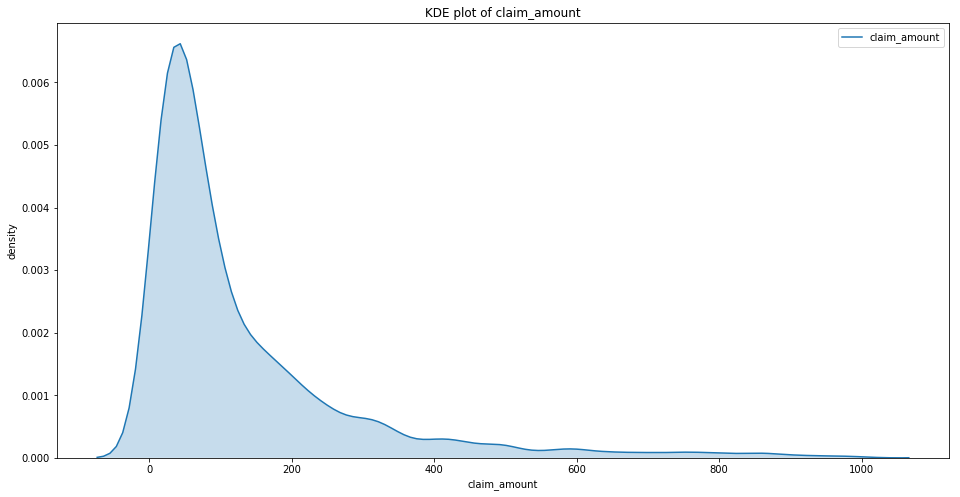

In [12]:
# Plot a KDE plot for claim_amount
import seaborn as sns

plt.figure(figsize=(10,6))

fig = plt.figure(figsize=(16,8))

ax1 = fig.add_subplot()

ax1 = sns.kdeplot(df['claim_amount'], 
                  label='claim_amount',
                  kernel = 'gau',
                  bw = 25,
                  shade = True)

ax1.set_xlabel("claim_amount")
ax1.set_ylabel("density")
ax1.set_title("KDE plot of claim_amount")



# correct (1)

**1 vii)** 

- What is the difference when calculating ($\text{median}$ - $\text{mean}$) of `claim_amount`? How will you interpret this value, in relation to the skewness of the distribution? Hint: Use the answers in **1 i)** and **1 vii)** to help you. **`[1]`**

In [26]:
# What is the difference when calculating (median - mean) of claim_amount? 
diff = df["claim_amount"].median() - df["claim_amount"].mean()
print(diff)

# The difference between median and mean is 60.28766399999998 (Mean greater than Median.

# How will you interpret the value of (median - mean), in relation to the skewness
# of the distribution?
# For a series that is positively skewed, the mean will be greater than the median.



# almost correct (0.75)
# 50% of the observations / majority of observations are equal to or below the mean

-60.28766399999998


<div class="alert alert-success">
**Checkpoint**: When you have completed Part 1, upload your progress to eLearn. eLearn only accepts the latest notebooks so if you have an existing notebook, your latest upload will **override** it.
</div>
## Part 2 (6 Marks)

For this question, the following values are defined:

Instrument | Variable | Value
--|--|--|
**Deductible**|$d$|$50$
**Co-insurance ratio**|$c$|$0.3$
**Policy Limit **|$l$|$500$

**2 i)** Write a function `compute_claim_after_deductible(claim_amount)` that takes in a claim amount `claim_amount` as the only parameter. `compute_claim_after_deductible()` returns `0` if the `claim_amount` is less than `50`, and returns (`claim_amount - 50`) if the claim amount is above `50`.

Hint: You may use the following code to help you. If you do, take note that you need to correct the logic errors. **`[0.5]`**

In [13]:
# Write a function compute_claim_after_deductible(claim_amount)
def compute_claim_after_deductible(claim_amount):
    d = 50 
    if(claim_amount < d):
        return 0
    else:
        return (claim_amount - d)

    
# correct (0.5)

**2 ii)** Now, create a new column `claim_amount_with_deductible`. This is the result of `apply`ing `compute_claim_after_deductible` to the column `claim_amount`. **`[0.5]`**

In [14]:
# Create a new column claim_amount_with_deductible by using Series.apply()
df["claim_amount_with_deductible"] = df["claim_amount"].apply(compute_claim_after_deductible)

df.head()


# correct (0.5)

,case_number,claim_amount,claim_amount_with_deductible
0,2004103065920,50.00,0.00
1,0226059M,312.50,262.50
2,2006012099982,90.00,40.00
3,2005010372123,216.00,166.00
4,2004092263584,178.74,128.74


**2 iii)** Plot a KDE plot for **both** `claim_amount` and `claim_amount_with_deductible` using `sns.kdeplot()`. They MUST be in the same KDE plot. 
Use the Gaussian kernel with bandwidth 25. In other words, add the parameters `kernel='gau', bw=25` when plotting. Also, add the parameters `shade=True` to shade the area under the KDE plot. **`[1]`**

Hint: Use the following lines to help you.
```python
fig2 = plt.figure(figsize=(16, 8))
ax1 = fig2.add_subplot(111)
```

Text(0.5, 1.0, 'KDE plot of claim_amount vs claim_amount_with_deductible')

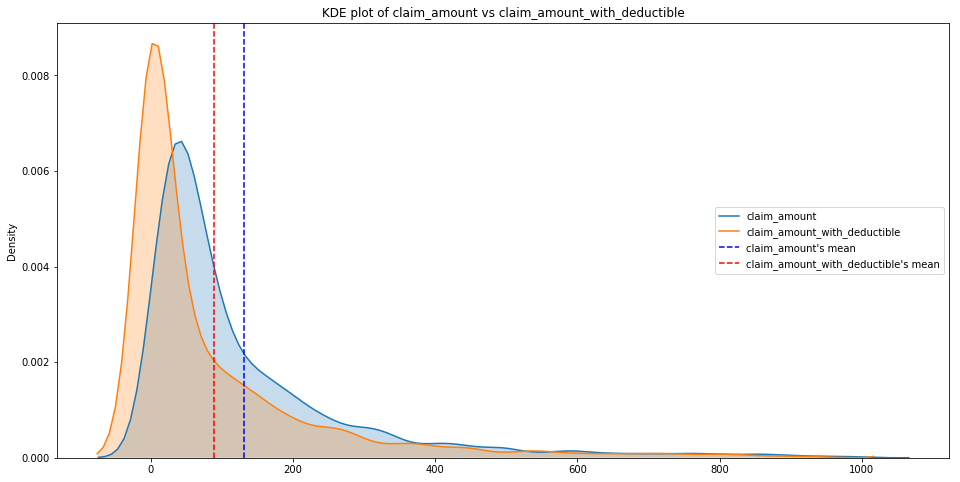

In [17]:
# Plot a KDE plot for both claim_amount and claim_amount_with_deductible. They MUST be
# in the same plot.

fig2 = plt.figure(figsize=(16, 8))
ax1 = fig2.add_subplot(111)
sns.kdeplot(df['claim_amount'], ax=ax1,kernel='gau',bw=25,shade = True)
sns.kdeplot(df['claim_amount_with_deductible'], ax=ax1,kernel='gau',bw=25,shade = True)

#Plot the mean for both KDE
plt.axvline(df['claim_amount'].mean(), linestyle = '--', color = 'b',label="claim_amount's mean")
plt.axvline(df['claim_amount_with_deductible'].mean(), linestyle = '--', color = 'r',label="claim_amount_with_deductible's mean")

ax1.set_ylabel("Density")
ax1.legend(loc=7)
ax1.set_title("KDE plot of claim_amount vs claim_amount_with_deductible")


# missing x axis label (0.25)

**2 iv)** How has the deductible impacted the shape of the KDE plot? Describe the change in terms of the shift of the mean and the proportion of the observations having the value of 0.

Hint: Consider using the results of `df.describe()` to explain your answer. **`[1]`**

In [30]:
# How has the deductible impacted the shape of the KDE plot? 

# Having the deductible has caused the KDE plot to be smaller (claim amounts are smaller) but with a higher density.
# For claim amounts with deductible, the mean is shifted left and is lesser than the mean of claim amounts without deductible (seen from KDE plot above).
# For claim amounts with deductible, the proportion of the observations having the value of zero is greater than that of claim amounts without deductible

# correct (1)


**2 v)** Write a function `compute_claim_payable_by_insurer(claim_amount)` that takes in a claim amount `claim_amount` as the only parameter. `compute_claim_payable_by_insurer()` performs the following:
1. if the `claim_amount` is less than `50`, return `0` 
2. if the claim amount is above `50`, deduct `50` from the `claim_amount`, then calculate the copayment paid by the insurer which is $1-0.3=0.7$ of the remaining amount
3. if the value calculated in step 2 exceeds the policy limit of `500`, then return `500`. If not, return the value calculated in step 2 

Hint: You may use the following code to help you. If you do, take note that you need to correct the logic errors. **`[1]`**

In [18]:
# Write a function compute_claim_payable_by_insurer(claim_amount)

def compute_claim_payable_by_insurer(claim_amount):
    d = 50
    c = 0.3
    l= 500
    
    if(claim_amount < d):
        return 0
    else:
        payout = (claim_amount - d)*(1-c)
        if(payout > l):
            return 500
        else:
            return payout
        
        
# correct (1)

**2 vi)** Now, create a new column `claim_amount_by_insurer`. This is the result of `apply`ing `compute_claim_payable_by_insurer()` to the column `claim_amount` **Be careful! Choose the correct column**. **`[0.5]`** 

In [19]:
# Create a new column claim_amount_with_deductible by using Series.apply()
df["claim_amount_by_insurer"] = df["claim_amount"].apply(compute_claim_payable_by_insurer)

df


# correct (0.5)

,case_number,claim_amount,claim_amount_with_deductible,claim_amount_by_insurer
0,2004103065920,50.00,0.00,0.000
1,0226059M,312.50,262.50,183.750
2,2006012099982,90.00,40.00,28.000
3,2005010372123,216.00,166.00,116.200
4,2004092263584,178.74,128.74,90.118
5,2006012600433,69.00,19.00,13.300
6,0806092M,40.00,0.00,0.000
7,2006072109864,15.00,0.00,0.000
8,2004102565645,250.00,200.00,140.000
9,0223181M,500.00,450.00,315.000


**2 vii)** Run the following cell to find out key statistics of the `df`. Fill in the blanks:

The maximum of `claim_amount_by_insurer` is this equal to the `(  ?  )`. 
**`[0.5]`** 

=== SUMMARY STATISTICS ===
       claim_amount  claim_amount_with_deductible  claim_amount_by_insurer
count   2500.000000                   2500.000000              2500.000000
mean     131.412664                     89.682040                61.883404
std      158.855611                    153.500587               103.325938
min        2.000000                      0.000000                 0.000000
25%       36.067500                      0.000000                 0.000000
50%       71.125000                     21.125000                14.787500
75%      162.652500                    112.652500                78.856750
max      991.000000                    941.000000               500.000000

=== SKEWNESS OF SERIES ===
claim_amount                    2.465065
claim_amount_with_deductible    2.635603
claim_amount_by_insurer         2.412770
dtype: float64

=== SUM OF SERIES ========
claim_amount                    328531.660
claim_amount_with_deductible    224205.100
claim_amount_by_in

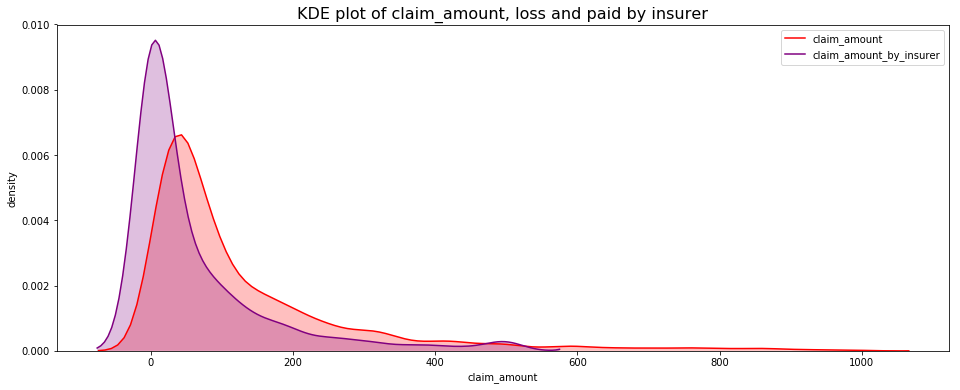

In [20]:
print("=== SUMMARY STATISTICS ===")
print(df.describe())
print()
print("=== SKEWNESS OF SERIES ===")
print(df.skew())
print()
print("=== SUM OF SERIES ========")
print(df[['claim_amount', 'claim_amount_with_deductible', 'claim_amount_by_insurer']].sum())
print()
print("=== VARIANCE OF SERIES ===")
print(df[['claim_amount', 'claim_amount_with_deductible', 'claim_amount_by_insurer']].var())

fig3 = plt.figure(figsize=(16, 6))
ax1 = fig3.add_subplot(111)
sns.kdeplot(df['claim_amount'], shade=True, kernel='gau', bw=25, ax=ax1, color='red')
sns.kdeplot(df['claim_amount_by_insurer'], shade=True, kernel='gau', bw=25, ax=ax1, color='purple')
ax1.set_xlabel("claim_amount")
ax1.set_ylabel("density")
ax1.set_title("KDE plot of claim_amount, loss and paid by insurer",fontsize=16)
plt.show()

# No additional code is required.
# Answer the following questions:
# Fill in the blanks with one of the following: deductible, co-payment, policy limit
# The maximum of claim_amount_by_insurer is this equal to the policy limit.



# correct (0.5)

**2 viii)** The definition of [moral hazard](https://www.investopedia.com/terms/m/moralhazard.asp). It states, with the application to property:

> When a property owner obtains insurance on a property, the contract is based on the idea that the property owner will avoid situations that may damage the property. The **moral hazard** exists that the property owner, because of the availability of the insurance, may be less inclined to protect the property, since the payment from an insurance company lessens the burden on the property owner in the case of a disaster.

Using the KDE plot and report in **2 vii)**, answer the following questions.

**i)** When a traveller buys travel insurance for his/her trip, how does moral hazard exist? Explain by comparing how his / her behaviour changes when there is and when there isn't travel insurance for the trip.

**ii)** By considering the burden of payment of both the insurer and insured, and using the concept of moral hazard, explain why an insurance company needs to implement a deductible, co-insurance and a policy limit for this travel insurance policy.

**`[1]`** 

In [34]:
# No additional code is required.
# Answer the following questions: When a traveller buys travel insurance for his/her 
# trip, how does moral hazard exist?

# When a traveller buys travel insurance, moral hazard exists as the traveller may engage him/herself to more risk-taking behaviours as the traveller no longer have to bear full costs of the behaviour
# As oppose to a traveller without traveller insurance,the traveller will be more careful in his/her actions so that he or she will be less prone to exposure to any risks as he/she will have to pay full costs for his/her actions


# correct (0.5)

In [35]:
# No additional code is required.
# Why does an insurance company need to implement a deductible, 
# co-insurance and a policy limit for this travel insurance policy.

# An insurance company need to implement a deductible, co-insurance and a policy limit for this travel insurance policy so as to mitigate the risk of moral hazards.
# By implementing a deductible, travellers have to pay the specified deductible amount if they were to make a claim before the insurance company needs top pay out to the policy holder.
# Together with a co-insurance, where only a specified proportion of the bill will be payable by the insurance company, travellers submitting a claim, will still have to pay if they were to submit a claim.
# This will likely make travellers be more inclined towards protecting their property as causing damage to it will not be fully covered by the Insuruer.
# By implenting a policy limit, the insurer can be protected from absurb claim amounts by travellers (E.g. Protecting Insurers from travellers that damages their own property in order to make ridiculous claim amounts from insurers)



# CORRECT (0.5)

<div class="alert alert-success">
**Checkpoint**: When you have completed Part 2, upload your progress to eLearn. eLearn only accepts the latest notebooks so if you have an existing notebook, your latest upload will **override** it.
</div>

**Credits**
- [healthcare.gov](https://www.healthcare.gov/glossary/) for the definitions of instruments
- [Investopedia](https://www.investopedia.com/terms/m/moralhazard.asp) for the definitions
- [TSA Claims Database](https://www.kaggle.com/terminal-security-agency/tsa-claims-database) for the dataset